# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


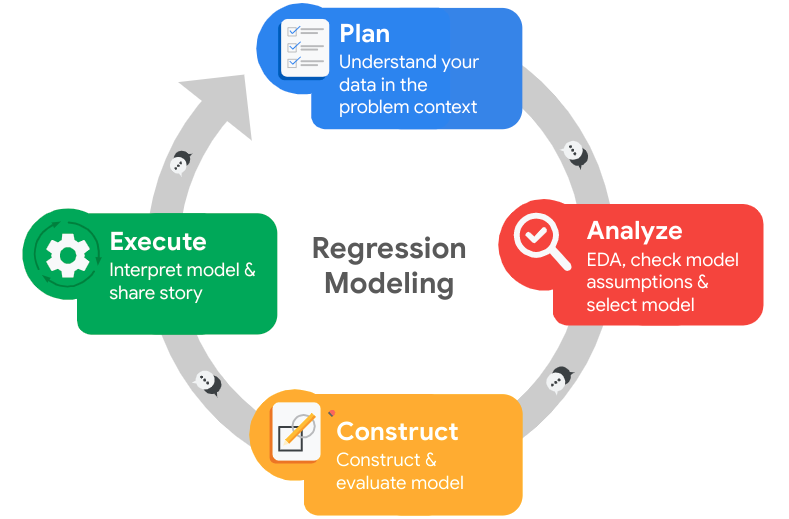

## **Pace: Plan stage**

In this project, I am a data professional working for a fictional company called Salifort Motors. 
Currently, there is a high rate of turnover among Salifort employees (this includes both employees who choose to quit their job and employees who are let go).


I have been tasked with building a machine learning model that could predict whether an employee will leave the company, and discover the reasons behind their departure. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. This is meant to be built from a survey carried out by the HR department. The survey data includes job title, department, number of projects, average monthly hours, and any other relevant data points. 

The dataset that I'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 



Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [7]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, \
                            ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from xgboost import plot_importance

import pickle

### Load dataset

In [8]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
df0.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [10]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df0.shape

(14999, 10)

### Gather descriptive statistics about the data

In [12]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [13]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
# Rename columns as needed

df1 = df0.rename(columns= {'Department': 'department', 'promotion_last_5years': 'promotion', 
                           'satisfaction_level': 'satisfaction', 'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure', 'Work_accident': 'work_accident'})


# Display all column names after the update
df1.columns


Index(['satisfaction', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left', 'promotion',
       'department', 'salary'],
      dtype='object')

### Check missing values

In [15]:
# Check for missing values
df1.isnull().sum()


satisfaction             0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion                0
department               0
salary                   0
dtype: int64

### Check duplicates

In [16]:
# Check for duplicates
df1.duplicated().sum()


3008

In [17]:
# Inspect some rows containing duplicates as needed
df1[df1.duplicated()]


,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [18]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df2 = df1.drop_duplicates()

# Display first few rows of new dataframe as needed
df2.head(10)

,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [19]:
df2.shape

(11991, 10)

In [20]:
df2.duplicated().sum()

0

### Check outliers

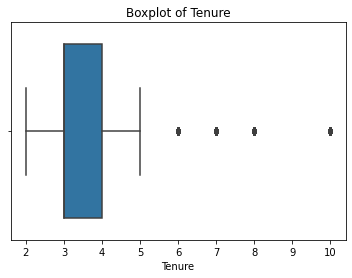

In [21]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df2['tenure'])
plt.title('Boxplot of Tenure')
plt.xlabel('Tenure');

In [22]:
# Determine the number of rows containing outliers
percentile25 = df2['tenure'].quantile(0.25)
percentile75 = df2['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr

outliers = df2[(df2['tenure'] >= upper_limit) | (df2['tenure'] <= lower_limit)].shape[0]

print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)
print('Number of rows with outliers in \'tenure\' column:', outliers)

Lower Limit: 1.5
Upper Limit: 5.5
Number of rows with outliers in 'tenure' column: 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

In [23]:
# Get numbers of people who left vs. stayed
print(df2['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df2['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


In [24]:
# Get numbers and percentages of people who have had a work accident.

print(df2['work_accident'].value_counts())
print(df2['work_accident'].value_counts(normalize=True))

0    10141
1     1850
Name: work_accident, dtype: int64
0    0.845718
1    0.154282
Name: work_accident, dtype: float64


In [25]:
# Get numbers and percentages of people who have been promoted.

print(df2['promotion'].value_counts())
print(df2['promotion'].value_counts(normalize=True))

0    11788
1      203
Name: promotion, dtype: int64
0    0.983071
1    0.016929
Name: promotion, dtype: float64


In [26]:
# Prepare the data for future plotting.

grouped_salary = (df2.groupby(['salary', 'left'])['department'].count()
                  .reset_index(name='count').sort_values('count', ascending=False))
grouped_salary

,salary,left,count
2,low,0,4566
4,medium,0,4492
3,low,1,1174
0,high,0,942
5,medium,1,769
1,high,1,48


In [27]:
# Prepare the data for future plotting.
grouped_department = (df2.groupby(['department', 'left'])['satisfaction'].count()
                      .reset_index(name='count').sort_values('count', ascending=False))
grouped_department

,department,left,count
14,sales,0,2689
18,technical,0,1854
16,support,0,1509
0,IT,0,818
2,RandD,0,609
12,product_mng,0,576
10,marketing,0,561
15,sales,1,550
4,accounting,0,512
6,hr,0,488


In [28]:
# Prepare the data for future plotting.
df2['overwork'] = np.where(df2['average_monthly_hours'] > 200, 1, 0)

In [29]:
# Get numbers and percentages of people who have overworked, considering a threshold of 200 hours per month.
print(df2['overwork'].value_counts())
print(df2['overwork'].value_counts(normalize=True))

0    6045
1    5946
Name: overwork, dtype: int64
0    0.504128
1    0.495872
Name: overwork, dtype: float64


### Data visualizations

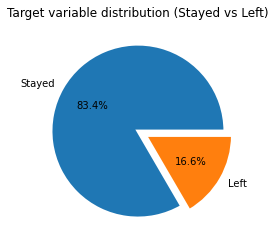

In [30]:
plt.pie(df2['left'].value_counts(), labels=['Stayed', 'Left'], 
        autopct='%1.1f%%', explode=(0, 0.1), wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Target variable distribution (Stayed vs Left)')
plt.show()


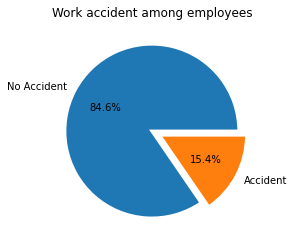

In [31]:
plt.pie(df2['work_accident'].value_counts(), labels=['No Accident', 'Accident'], 
        autopct='%1.1f%%', explode=(0, 0.1), wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.title('Work accident among employees')
plt.show()

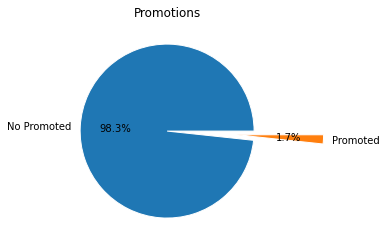

In [32]:
plt.pie(df2['promotion'].value_counts(), labels=['No Promoted', 'Promoted'], 
        autopct='%1.1f%%', explode=(0, 0.8), wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
plt.title('Promotions')
plt.show()


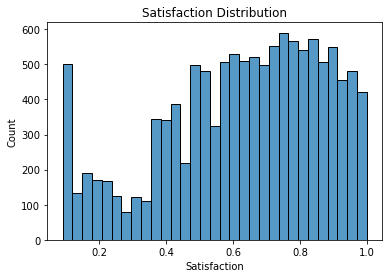

In [33]:
sns.histplot(df2['satisfaction'])
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.show()

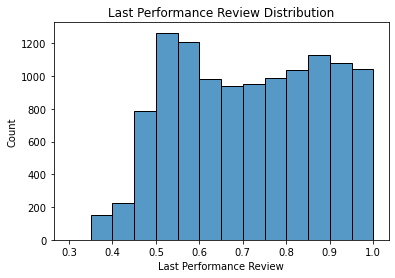

In [34]:
sns.histplot(df2['last_evaluation'], binrange=(0.3, 1), binwidth=0.05)
plt.title('Last Performance Review Distribution')
plt.xlabel('Last Performance Review')
plt.show()


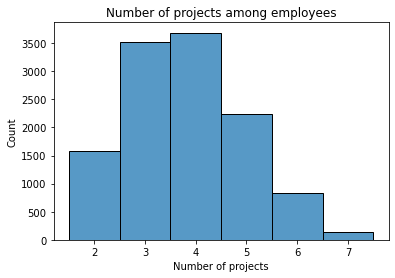

In [35]:
sns.histplot(df2['number_project'], discrete=True)
plt.title('Number of projects among employees')
plt.xlabel('Number of projects')
plt.show()

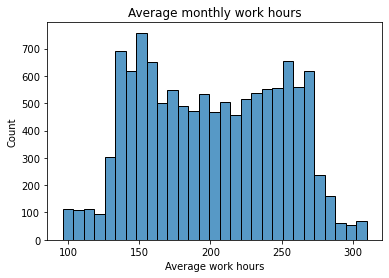

In [36]:
sns.histplot(df2['average_monthly_hours'])
plt.title('Average monthly work hours')
plt.xlabel('Average work hours')
plt.show()

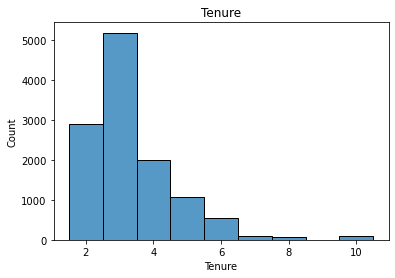

In [37]:
sns.histplot(df2['tenure'], discrete=True)
plt.title('Tenure')
plt.xlabel('Tenure')
plt.show()

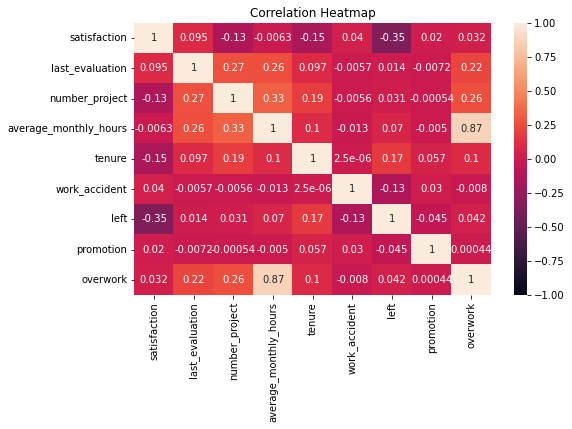

In [38]:
plt.figure(figsize=(8, 5))
sns.heatmap(df2.corr(), annot=True, vmin= -1, vmax=1)
plt.title('Correlation Heatmap');


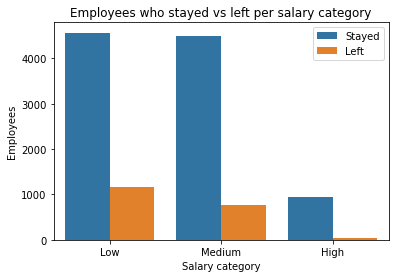

In [39]:
labels=['Stayed', 'Left']

g = sns.barplot(data = grouped_salary, x = 'salary', y = 'count', hue='left')
plt.xlabel('Salary category')
plt.ylabel('Employees')
plt.title('Employees who stayed vs left per salary category')
g.set(xticklabels=["Low", "Medium", "High"])
h, l = g.get_legend_handles_labels()
g.legend(h, labels)
plt.show()

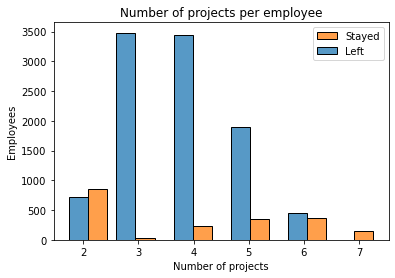

In [40]:
fig, ax1 = plt.subplots()
g = sns.histplot(data = df2, x='number_project', hue='left', multiple='dodge', shrink=4)
plt.xlabel('Number of projects')
plt.ylabel('Employees')
plt.title('Number of projects per employee')
legend = ax1.get_legend()
ax1.legend(['Stayed', 'Left'])
plt.show()


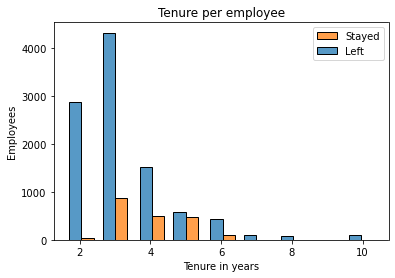

In [41]:
fig, ax1 = plt.subplots()
gt = sns.histplot(data = df2, x='tenure', hue='left', multiple='dodge', shrink=8)
plt.xlabel('Tenure in years')
plt.ylabel('Employees')
plt.title('Tenure per employee')
legend = ax1.get_legend()
ax1.legend(['Stayed', 'Left'])
plt.show()

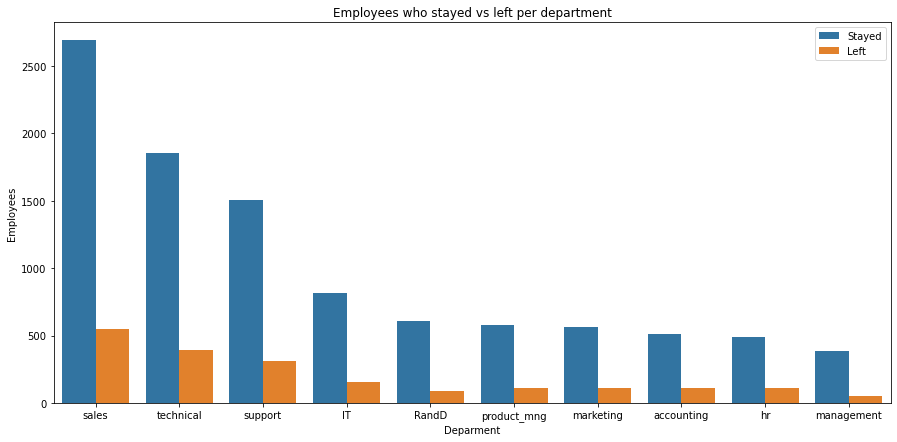

In [42]:
labels=['Stayed', 'Left']

plt.figure(figsize = (15,7))
gd = sns.barplot(data = grouped_department, x = 'department', y = 'count', hue='left')
plt.xlabel('Deparment')
plt.ylabel('Employees')
plt.title('Employees who stayed vs left per department')
h, l = gd.get_legend_handles_labels()
gd.legend(h, labels)
plt.show()


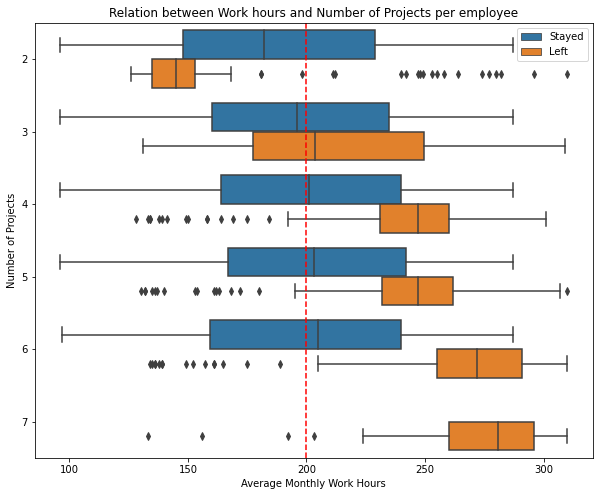

In [43]:
labels=['Stayed', 'Left']
plt.figure(figsize=(10, 8))
box_pro_work = sns.boxplot(data=df2, x='average_monthly_hours', y='number_project', hue='left', orient='h')
plt.xlabel('Average Monthly Work Hours')
plt.ylabel('Number of Projects')
plt.title('Relation between Work hours and Number of Projects per employee')
plt.axvline(200, linestyle= '--', color= 'red')
h, l = box_pro_work.get_legend_handles_labels()
box_pro_work.legend(h, labels)
plt.show()

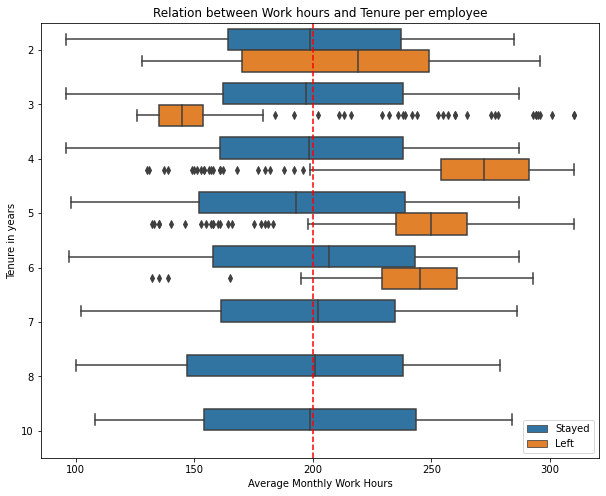

In [44]:
labels=['Stayed', 'Left']
plt.figure(figsize=(10, 8))
box_ten_work = sns.boxplot(data=df2, x='average_monthly_hours', y='tenure', hue='left', orient='h')
plt.xlabel('Average Monthly Work Hours')
plt.ylabel('Tenure in years')
plt.title('Relation between Work hours and Tenure per employee')
plt.axvline(200, linestyle= '--', color= 'red')
h, l = box_ten_work.get_legend_handles_labels()
box_ten_work.legend(h, labels)
plt.show()

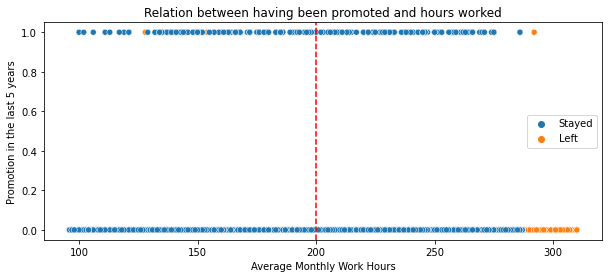

In [45]:
labels=['Stayed', 'Left']
plt.figure(figsize=(10, 4))
scat_pro_work = sns.scatterplot(data=df2, x='average_monthly_hours', y='promotion', hue='left')
plt.xlabel('Average Monthly Work Hours')
plt.ylabel('Promotion in the last 5 years')
plt.title('Relation between having been promoted and hours worked')
plt.axvline(200, linestyle= '--', color= 'red')
h, l = scat_pro_work.get_legend_handles_labels()
scat_pro_work.legend(h, labels)
plt.show()

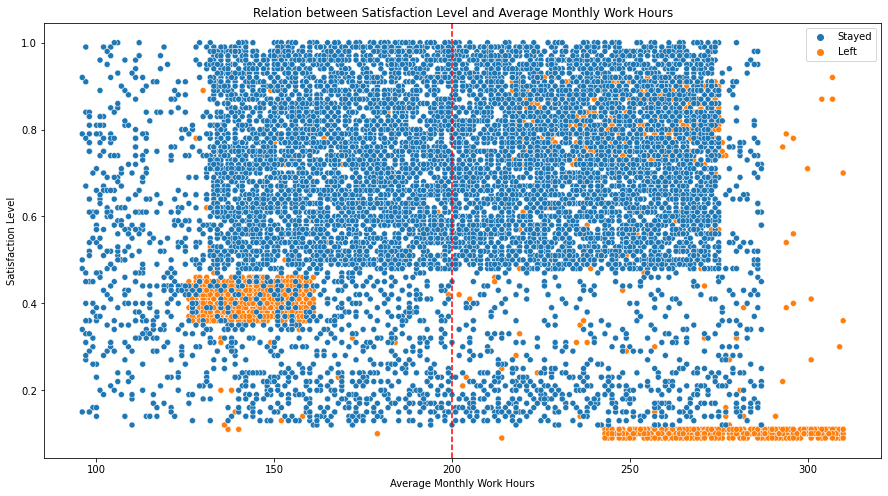

In [46]:
labels=['Stayed', 'Left']
plt.figure(figsize=(15, 8))
scat_sat_work = sns.scatterplot(data=df2, x='average_monthly_hours', y='satisfaction', hue='left')
plt.xlabel('Average Monthly Work Hours')
plt.ylabel('Satisfaction Level')
plt.title('Relation between Satisfaction Level and Average Monthly Work Hours')
plt.axvline(200, linestyle= '--', color= 'red')
h, l = scat_sat_work.get_legend_handles_labels()
scat_sat_work.legend(h, labels)
plt.show()

### Insights

1. This is an imbalanced dataset because the target variable 'left' has a distribution of 84% stayed vs 16% left. However, this is not a big inequality, so I will not perform class balancing.
2. 15% of employees have had work accidents. This represents about 1850 employees, which I consider it is a high number that may cause people to quit.
3. Only 1.7% of the employees have been promoted. This is another crucial factor that will frustrate employees because they don't feel valued and hence, they decide to resign.
4. Almost 50% of the employees put in extra hours (more than 200 hours per month in average). This number was obtained from the assumption that the company operates from Monday to Saturday for 8 hours per day, and each employee has 2 weeks off per year. The normal monthly work hours should amount to 50 weeks * 48 hours per week / 12 months = 200 hours per month. 
5. There is not a high correlation between variables.
6. Employees with high salaries are less prone to leave the company, whereas employees resignation is more common among workers with low and medium salaries.
7. It seems that the ideal number of projects per employee is 3, because the majority of employees with 3 projects stayed.
8. There are not significant patterns of employees leaving the company per department, so I don't think it is a crucial factor.
9. If we plot the average monthly work hours and number of projects simultaneously, we can conclude that there are two clear groups of people who left the company:
   a) Employees with 4 or more projects who overworked each month, reaching the 250+ working hours. It seems that the more projects the employee is responsible for, the more hours they put in. However, this tendency gets to a point in which all employees with 7 projects left the company.
   b) A group of employees with 2 projects that worked around 150 hours per month in average. It seems that they underperformed and they were given only two projects so, in the end, they probably ended up quitting. Additionally, since overworking in this company is so common, they must have felt the pressure of their workmates to attain long working hours and they either couldn't keep up, or didn't want to devote that many number of hours to the company.
10. By plotting tenure and average working hours together, we can see that employees with 7 years or more in the company stop quitting (or being let go). Furthermore, employees who have been 3 years with the company work much less hours than the rest of the employees and abandoned the company. Workers between 4 and 6 years of tenure who left tend to overwork.
11. Plotting promotions and hours worked tells us that all the employees who haven't been promoted and work long hours (more than 275+ per month) left the company. This pattern is dramatically reduced if the employees have been promoted, so this is an important variable with a considerable predicting power.
12. Lastly, if we map satisfaction level and hours worked, we can see two distinct groups of employees who left the company:
a) Employees with a very low satisfaction level (around 10%) and working hours of more than 225 approximately.
b) Employees that worked much less than the general average of 200 and have a low satisfaction level (around 40%).
    This could indicate that the satisfaction level decreases as the working hours increase.



# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Evaluate the model

### Identify the type of prediction task.

I am trying to predict which employee will leave or stay in the company. This is a classification task.

### Identify the types of models most appropriate for this task.

Logistic regression or a Tree-based Machine Learning model.

### Modeling Approach A: Logistic Regression Model

In [47]:
df2.shape

(11991, 11)

In [48]:
# Remove outliers detected previously, since Logistic Regression models are sensitive to outliers.

df_cleaned = df2[(df2['tenure'] <= upper_limit) & (df2['tenure'] >= lower_limit)]


In [49]:
df_cleaned.shape

(11167, 11)

In [50]:
# Categorise columns 'salary' and 'department'.

df_enc = df_cleaned.copy()

df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

df_final = pd.get_dummies(df_enc, drop_first=True)

In [51]:
# Isolate y and x variables

y = df_final['left']
X = df_final.copy()
X = X.drop(['left'], axis=1)

In [52]:
# Split the dataframe into train and test datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [53]:
# Check that the split is correctly made.
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

8375
2792
8375
2792


In [54]:
# Fit the model to the train data

clf = LogisticRegression(random_state=42, solver='liblinear', max_iter=500).fit(X_train, y_train)

In [55]:
# Generate predictions.
y_pred = clf.predict(X_test)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



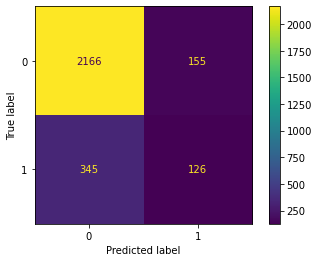

In [56]:
# Plot a confusion matrix display

cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)

disp.plot(values_format='');

In [57]:
# Print out model's metrics.

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

target_names = ['Employee would not leave', 'Employee would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

0.8209169054441261
0.4483985765124555
0.267515923566879
0.33510638297872336
                          precision    recall  f1-score   support

Employee would not leave       0.86      0.93      0.90      2321
    Employee would leave       0.45      0.27      0.34       471

                accuracy                           0.82      2792
               macro avg       0.66      0.60      0.62      2792
            weighted avg       0.79      0.82      0.80      2792



As it can be seen on the classification report, the model is fairly good at predicting employees who would not leave. However, following the stakeholders directives, we must focus on predicting employees turnover. The Logistic Regression model isn't very good at predicting these, since their scores are quite low. For this reason, we must go back to the Construct Phase and keep building Tree-based models with a view to reach higher evaluation metrics.

### Modeling Approach B: Decision Tree and Random Forest Models.

#### Decision tree model.

In [58]:
# Define X, y and split into train and test sets.

y = df_final['left']
X = df_final.copy()
X = X.drop(['left'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [59]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [60]:
tree_param = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

In [61]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [62]:
# Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

tree1 = GridSearchCV(decision_tree, tree_param, scoring=scoring, cv=5, refit='roc_auc')

In [63]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 3.98 s, sys: 0 ns, total: 3.98 s
Wall time: 3.98 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [64]:
# Identify the optimal values for the decision tree parameters.
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [65]:
# Check best AUC score on CV
tree1.best_score_

0.9750741469209515

In [66]:
tree1.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc', 'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision',

In [67]:
# Define a function that lets add the results of each model to a table.

def make_results(model_name:str, model_object, metric:str):
    
    '''
    Accepts as arguments a model name, a fit GridSearchCV model object, and a metric of your choosing.
    
    Returns a Pandas df with the accuracy, recall, precision, f1 and auc scores for the model
    with the best 'metric' score across all validation folds.
    '''
    
    # Get results from the cross-validation and put them in a dataframe.
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    
    # Isolate the row of the df with the max 'metric' score.
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract metrics from the max row.
    
    f1 = best_estimator_results.mean_test_f1
    accuracy = best_estimator_results.mean_test_accuracy
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    auc = best_estimator_results.mean_test_roc_auc
    
    # Create a table of results.
    
    table = pd.DataFrame()
    
    table = pd.DataFrame({'Model': [model_name],
                         'F1': [f1],
                         'Accuracy': [accuracy],
                         'Precision': [precision],
                         'Recall': [recall],
                         'AUC': [auc]})
    
    return table

In [68]:
# Gather decision tree's scores.
tree1_results = make_results('Decision Tree', tree1, 'auc')
tree1_results

,Model,F1,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.933474,0.97803,0.952118,0.915663,0.975074


Even though this is a pretty good score, decision trees are prone to overfitting since they are very sensitive to the specific data they are trained on, so let's build a random tree forest model. This kind of model reduces variance by combining multiple models trained on slightly different data subsets (thanks to techniques like bagging).

#### Random tree model.

In [71]:
# Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [76]:
%%time

rf1.fit(X_train, y_train)

CPU times: user 12min 10s, sys: 1.37 s, total: 12min 11s
Wall time: 12min 11s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [77]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [78]:
with open(path+'rf1_model.pickle', 'wb') as to_write:
    pickle.dump(rf1, to_write)

In [79]:
with open(path+'rf1_model.pickle', 'rb') as to_read:
    rf1 = pickle.load(to_read)

In [80]:
# Check best AUC score on CV
rf1.best_score_

0.982482851144302

In [81]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [82]:
# Add Random Forest's results to the results table.

rf_results = make_results('Random Forest', rf1, 'auc')

results = pd.concat([tree1_results, rf_results])
results

,Model,F1,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.933474,0.978030,0.952118,0.915663,0.975074
0,Random Forest,0.944538,0.981851,0.972281,0.918497,0.982483


The Random Forest model has slightly higher scores than the decision tree model. Let's use our test data to see how the Random Forest model predicts on new, unseen data.

In [83]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision], 
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [84]:
# Get predictions on test data
rf_test_results = get_scores('Random Forest Test', rf1, X_test, y_test)

In [85]:
# Add Random Forest's test results to the results table.
results = pd.concat([results, rf_test_results])
results

,Model,F1,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.933474,0.978030,0.952118,0.915663,0.975074
0,Random Forest,0.944538,0.981851,0.972281,0.918497,0.982483
0,Random Forest Test,0.950324,0.983524,0.967033,0.934183,0.963860


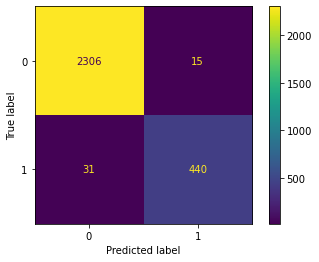

In [86]:
# Construct a confusion matrix for the Random Forest test.

preds = rf1.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, preds, labels = clf.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)

disp.plot(values_format='');

In [87]:
# Prepare the data to plot feature importances.
feature_names = X.columns

importances = rf1.best_estimator_.feature_importances_

forest_importances = (pd.DataFrame(({'features': feature_names, 
                                     'importances': importances}))
                                     .sort_values(by='importances', ascending=False).reset_index())

In [88]:
# Isolate top 5 variables.
forest_importances_top5 = forest_importances.nlargest(5, 'importances')

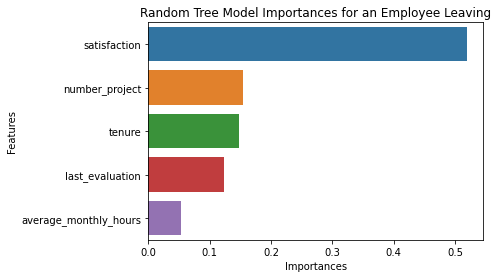

In [89]:
# Plot a barplot showing the Top 5 feature importances.

sns.barplot(data=forest_importances_top5, x='importances', y='features', orient = 'h')
plt.title('Random Tree Model Importances for an Employee Leaving')
plt.xlabel('Importances')
plt.ylabel('Features')
plt.show()

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

A Logistic Regression model, a Decision Tree and a Random Forest models were built and trained on a portion of the data, resulting in the Random Forest model being the champion. This one was chosen based on the highest AUC ROC coefficient, since this is a reliable metric for imbalanced datasets and also, it is more comparable between different models because it contemplates different classification thresholds.


Once we decided on one model, we tested it against a subportion of the dataset and the results were promising: AUD ROC score: 0.963. 


Regarding the errors that this model inevitably makes, I consider that a false negative has a bigger impact since it fails to predict an employee leaving the company, whereas a false positive caused the company giving incentives to an employee who wasn't going to quit. The cost of the former is way higher than the latter's. Even though precision is a bit higher than recall (96.70% vs 93.41%), this model has got an excellent predicting success. 


Next, we plotted the importances of each variable or, in other words, the predictive power of each feature in our model. Satisfaction level proved to be the most significant factor in determining if an employee will leave the company. Approximately 50% of the predictions were explained by this variable. Number of projects, tenure, last evaluation score and average monthly hours were also important in deciding the prospects of an employee in Salifort Motors.

### Conclusion, Recommendations, Next Steps

In my view, the company has several structural problems:
- Practically half of the staff members works overtime, which I assume has a negative impact on satisfaction levels. The company should hire more employees in order to distribute the workload more equally and to reduce the overall overtime.

- Likewise, employees handle too many projects at the same time which has proved to cause people to leave the company.

- In addition to working long hours, it seems that employees don't receive the appraisal and recognition for their hard work in the form of a promotion. Managers should value their teams' effort with positive feedback and pay rises.

- Tenure plays an important role in keeping employees loyal to the company, since the longer they stay with the company, the less likely they leave it is. For this reason, any effort in trying to retain employees will be rewarded by them staying in the team.

Needless to say that this is just a baseline model with lots of room for improvement and further investigation. We could try building an XGBoost model, or exclude those columns lacking of predictive power. Plus, building a K-means model would help better understand the different groups of employees in the company.